In [7]:
import matplotlib.pyplot as plt 
import glob 
import numpy as np 

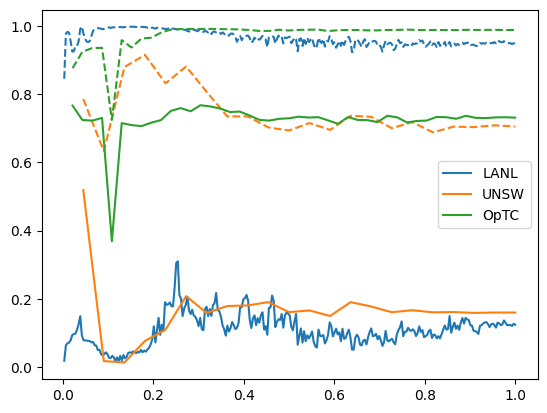

In [15]:
label = {
    'lanl14argus': 'LANL', 
    'unsw': 'UNSW',
    'optc': 'OpTC'
}
for i,ds in enumerate(label.keys()): 
    fn = f"../pretrained/rw_sampling/{ds}/rw_bert_{ds.replace('_e8', '')}_eval_tiny.csv"
    with open(fn, 'r') as f: 
        lines = f.read() 
    
    lines = lines.split('\n')[1:]

    time,ap,va = [],[],[]
    for l in lines:
        if not l: 
            continue 
        
        tokens = l.split(',')
        if ds == 'lanl14argus': 
            t = tokens[1]
            a = tokens[3]
            v = tokens[-1]
        else: 
            t = tokens[0]
            a = tokens[2]
            v = tokens[-1]
        
        time.append(float(t))
        ap.append(float(a))
        va.append(float(v))

    time = np.array(time)
    time /= time.max()
    plt.plot(time, ap, label=label[ds], color=f'C{i}')
    plt.plot(time, va, color=f'C{i}', linestyle='--')

plt.legend()
plt.show()